# ICESat GLAS Exercise
January 25, 2019  
UW CEWA599: Geospatial Data Analysis  
David Shean

## Objectives
1. Apply some of the core NumPy, Pandas, and Matplotlib functionality
2. Learn basic data manipulation and exploration with a relatively small, clean point dataset
3. Learn a bit more about the ICESat mission, the GLAS instrument, and laser altimetry

## Background
The NASA Ice Cloud and land Elevation Satellite ([ICESat](https://icesat.gsfc.nasa.gov/icesat/)) was a NASA mission carrying the Geosciences Laser Altimeter System (GLAS) instrument: a big ol' space laser, pointed down at the Earth (and unsuspecting Earthlings).  

It measured surface elevations by precisely tracking laser pulses emitted from the spacecraft at a rate of 40 Hz (a new pulse every 0.025 seconds).  These pulses traveled through the atmosphere, reflected off the surface, back up through the atmosphere, and into space, where some small fraction of that original energy was received by a large telescope on the spacecraft.  The instrument electronics precisely recorded the time when these intrepid photons left the instrument and when they returned.  The position and orientation of the spacecraft was precisely known, so the two-way traveltime (and assumptions about the speed of light and propagation through the atmosphere) allowed for precise forward determination of the spot on the Earth's surface (or cloud tops, as was often the case) where the reflection occurred.  The laser spot size varied during the mission, but was ~70 m in diameter. 

ICESat collected billions of measurements from 2003 to 2009, and was operating in a "repeat-track" mode that sacrificed spatial coverage for repeat observations along the same ground tracks over time.  One primary science focus involved elevation change over the Earth's ice sheets.  It allowed for early measurements of full Antarctic and Greenland ice sheet elevation change, which offered a detailed look at spatial distribution and rates of mass loss, and total ice sheet contributions to sea level rise.  

There were problems with the instrument during the mission, so it was operated in short campaigns lasting only a few months to prolong the full mission lifetime (and build a longer time series).  While the primary measurements focused on the polar regions, many measurements were also collected over lower latitudes, to meet other important science objectives (e.g., estimating biomass in the Earth's forests, observing sea surface height over time). 

## CONUS dataset
A few years ago, I wanted to evaluate ICESat coverage near glaciers in the Continental United States (CONUS).  I downloaded all of the GLAS shot data, and wrote a Python script to filter and process the data (the `glas_proc.py` script here [https://github.com/dshean/icesat_tools](https://github.com/dshean/icesat_tools))

These scripts produced a csv file `GLAH14_tllz_conus_lulcfilt_demfilt.csv` that contains ICESat shots that passed the following filters:
* Within some buffer (~110 km) of mapped glacier polygons from the Randolph Glacier Inventory (RGI)
* Returns from exposed (bare) ground (31) or snow/ice (12) according to on a 30-m NLCD Land-use/Land-cover dataset
* Elevation values within some threshold (200 m, I believe) of elevations from an external reference DEM (void-filled 1/3-arcsec (30-m) SRTM-GL1), used to remove spurious points and returns from clouds.
* Various other ICESat-specific quality flags

The final file contains a very small subset of the total shots in the raw data.  The remaining points should represent returns from the Earth's surface with reasonably high quality, and can be used for subsequent analysis.

# Instructions
1. Take a look at the `GLAH14_tllz_conus_lulcfilt_demfilt.csv` file on the command line (use `less` or `more`)
2. Note the structure, header on the first line: `decyear,ordinal,lat,lon,glas_z,dem_z,dem_z_std,lulc`
3. Fill in the notebook:  
    3.1 Play around with the data in NumPy (first half)  
    3.2 Play around with the data in Pandas (second half)  
    3.3 Generate some plots with Matplotlib (both)  
4. Prepare a separate markdown file with basic overview of your project idea
5. Add and commit the notebook and project file

# Initial setup

In [1]:
#Magic function to enable interactive plotting in Jupyter notebook
#Allows you to zoom/pan within plots after generating
#Normally, this would be %matplotlib notebook, but since we're using Juptyerlab, we need a different widget
%matplotlib inline

In [2]:
#Import necesary modules
#Use shorter names (np, pd, plt) instead of full (numpy, pandas, matplotlib.pylot) for convenience
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#The csv file containing ICESat shots (shouldn't need path if working with notebook in same directory)
fn = 'GLAH14_tllz_conus_lulcfilt_demfilt.csv'

# NumPy Exercises

# Load the file
* NumPy has some convenience functions for loading text files: loadtxt() and genfromtxt()
* Use loadtxt (simpler), but make sure you properly set the delimiter and handle the first row (see the skiprows option)
    * Can use the `np.loadtxt?` ipython lookup, or online documentation
* Store the NumPy array as variable called `glas_np`

In [4]:
glas_np = np.loadtxt(fn,delimiter=',',skiprows=1)

# How many records (individual ICESat shots) are there in your array?

In [5]:
np.size(glas_np,0)

65236

## Examine the first 3 rows
* Use slicing
* Note that all values in the array have the same datatype (float64), which is the standard for NumPy arrays

In [6]:
glas_np[:3]

array([[ 2.00313957e+03,  7.31266943e+05,  4.41578970e+01,
        -1.05356562e+02,  1.39851000e+03,  1.40052000e+03,
         3.30000000e-01,  3.10000000e+01],
       [ 2.00313957e+03,  7.31266943e+05,  4.41501750e+01,
        -1.05358116e+02,  1.38711000e+03,  1.38464000e+03,
         4.30000000e-01,  3.10000000e+01],
       [ 2.00313957e+03,  7.31266943e+05,  4.41486320e+01,
        -1.05358427e+02,  1.39283000e+03,  1.38349000e+03,
         2.80000000e-01,  3.10000000e+01]])

## Examine the column with glas_z values
* You will need to figure out which column number corresponds to these values, then slice the array to return all rows, but only that column

In [7]:
# display column names
np.genfromtxt(fn,dtype=None,delimiter=',',names=True)

#pulled into new variable since using frequently
glas_z = glas_np[:,4]
print(glas_z)

[1398.51 1387.11 1392.83 ... 1556.19 1556.18 1556.32]


## Compute the mean and standard deviation of the glas_z values

In [8]:
print(np.mean(glas_z))
print(np.std(glas_z))

1791.4941674842112
1037.1755321331423


# Create a Matplotlib scatter plot of the glas_z values
* Make sure your x and y coordinates are defined properly
* Use point color to represent the elevation

Text(0.5, 1.0, 'CONUS ICESat surface elevation')

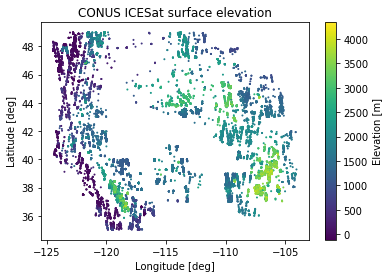

In [9]:
fg = plt.figure()
plt.scatter(glas_np[:,3],glas_np[:,2],1,glas_z)
plt.ylabel('Latitude [deg]')
plt.xlabel('Longitude [deg]')
p1 = plt.colorbar()
p1.ax.set_ylabel('Elevation [m]')
plt.xticks(ticks=range(-125,-100,5))
plt.title('CONUS ICESat surface elevation')

# Use conditionals and fancy indexing to extract points from 2003
* Design a "filter" to isolate the points from 2003
    * Can use boolean indexing
    * Can use bitwise operator `&` to combine two boolean arrays
    * Can extract values from original array using the final boolean index
* Create a new NumPy array to store these points
* How many points were acquired in 2003?

In [10]:
idx = np.where(np.floor(glas_np[:,0]) == 2003)
pnts2003 = glas_np[idx,:]
np.size(pnts2003)

82328

# Get the number of shots for each year
* Determine a set of unique years
* Get the shot count for each year (using similar approach as previous question)
* Calculate mean and standard deviation of the glas_z elevations for each year
* Print using string formatting, limiting elevations to to 1 decimal place (e.g. '2003 10291 1669.6 992.0')

In [11]:
years = np.unique(np.floor(glas_np[:,0]))
cntSave = np.empty([0])

for i in years:
    idxYr = np.where(np.floor(glas_np[:,0]) == i)
    yrNum = np.size(idxYr)
    yrMean = np.mean(glas_z[idxYr])
    yrStd = np.std(glas_z[idxYr])
    print("%4.0i,%5.0i,%5.1f,%5.1f"%(i,yrNum,yrMean,yrStd))
    
    # variable populating for following question
    cntSave = np.append(cntSave,yrNum)

2003,10291,1669.6,992.0
2004,11519,1828.4,1020.3
2005,13122,1840.7,1053.3
2006,12283,1898.0,1046.2
2007, 8516,1831.0,1054.2
2008, 6668,1766.7,1082.0
2009, 2837,1335.0,805.0


## Create a Matplotlib bar graph for the number of shots in each year
* Use black bars instead of the default blue
* Label the x and y axes
* Add a title

Text(0.5, 1.0, 'ICESat Glaciated CONUS')

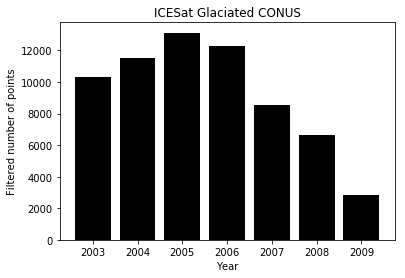

In [12]:
plt.figure()
plt.bar(years,cntSave,facecolor='black')
plt.xlabel('Year')
plt.ylabel('Filtered number of points')
plt.title('ICESat Glaciated CONUS')




# Pandas
* A better way to deal with tabular data
* With NumPy, we had to remember which column represented which variable (lat, lon, glas_z, etc)
* Pandas allows you to store data with different types, and then reference using more meaningful labels
    * With NumPy: `glas_np[:,4]`
    * with Pandas: `glas_df['glas_z'] 
* A good "10-minute" reference with examples: https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

## Load the csv file into a Pandas DataFrame named glas_df

In [13]:
glas_df = pd.read_csv(fn)

## Inspect the DataFrame
* Can use built-in methods head() and tail() here

In [14]:
#glas_df.head()
glas_df.tail()

,decyear,ordinal,lat,lon,glas_z,dem_z,dem_z_std,lulc
65231,2009.775995,733691.238340,37.896222,-117.044399,1556.16,1556.43,0.0,31
65232,2009.775995,733691.238340,37.897769,-117.044675,1556.02,1556.43,0.0,31
65233,2009.775995,733691.238340,37.899319,-117.044952,1556.19,1556.44,0.0,31
65234,2009.775995,733691.238340,37.900869,-117.045230,1556.18,1556.44,0.0,31
65235,2009.775995,733691.238341,37.902420,-117.045508,1556.32,1556.44,0.0,31


## Check the data types for each column

In [15]:
glas_df.dtypes

decyear      float64
ordinal      float64
lat          float64
lon          float64
glas_z       float64
dem_z        float64
dem_z_std    float64
lulc           int64
dtype: object

## Do a quick inspection of the DataFrame with the describe() method

In [16]:
glas_df.describe()

,decyear,ordinal,lat,lon,glas_z,dem_z,dem_z_std,lulc
count,65236.000000,65236.000000,65236.000000,65236.000000,65236.000000,65236.000000,65236.000000,65236.000000
mean,2005.945322,732291.890372,40.946798,-115.040612,1791.494167,1792.260964,5.504748,30.339444
std,1.729573,631.766682,3.590476,5.465065,1037.183482,1037.925371,7.518558,3.480576
min,2003.139571,731266.943345,34.999455,-124.482406,-115.550000,-114.570000,0.000000,12.000000
25%,2004.444817,731743.803182,38.101451,-119.257599,1166.970000,1168.240000,0.070000,31.000000
50%,2005.846896,732256.116938,39.884541,-115.686241,1555.730000,1556.380000,1.350000,31.000000
75%,2007.223249,732758.486046,43.453565,-109.816475,2399.355000,2400.072500,9.530000,31.000000
max,2009.775995,733691.238341,48.999727,-104.052336,4340.310000,4252.940000,49.900000,31.000000


## Get the number of shots

In [17]:
len(glas_df)

65236

## Examine the glas_z column (DataSeries) from the larger DataFrame
* Compute the mean and standard deviation

In [18]:
print(glas_df["glas_z"].mean())
print(glas_df["glas_z"].std())

1791.494167484202
1037.1834816353876


## Use the Pandas plotting functionality to create a scatterplot of glas_z values
* Note that labels and colorbar are automatically plotted!
* Adjust the size of the points using the `s=1` keyword
* Experiment with color ramps and pick one that you like:
    * https://matplotlib.org/examples/color/colormaps_reference.html (I prefer `inferno`)

Text(0.5, 1.0, 'CONUS ICESat surface elevation')

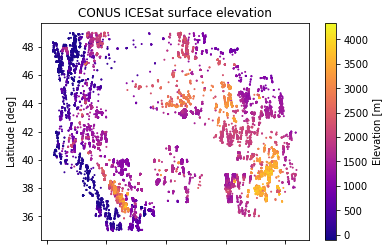

In [19]:
glas_df.plot.scatter(x="lon",y="lat",s=1,c=glas_z,cmap=plt.get_cmap('plasma'))
plt.ylabel('Latitude [deg]')
plt.xlabel('Longitude [deg]')

plt.gcf().get_axes()[1].set_ylabel('Elevation [m]')
plt.xticks(ticks=range(-125,-100,5))
plt.title('CONUS ICESat surface elevation')

## Geographic coordinate sanity check
1. Any potential issues with the aspect ratio of this map?
2. What is the length of a degree of latitude at 35° latitude?  49° latitude?
3. What is the length of a degree of longitude at 35° latitude?  49° latitude?

# We can expect some major issues with the aspect ratio in this map
## Due to the curvature of earth, a degree of longitude will constrict as you move towards the poles and expand as you approach the equator. This will result in warping when plotted on a cartesian coordinate system 
### 1.) @ 35°N, 1°latitude = 111 km. @ 49°N, 1°latitude =  111 km.
### 2.) @ 35°N, 1°longitude = 91 km. @ 49°N, 1°longitude =  73 km.


## Create a histogram of all glas_z elevation values
* Make sure that you use enough bins to avoid aliasing (might require some trial and error)
* What do you note about the distribution?
* Any negative values?

Text(0.5, 1.0, 'ICESat filtered elevation distribution')

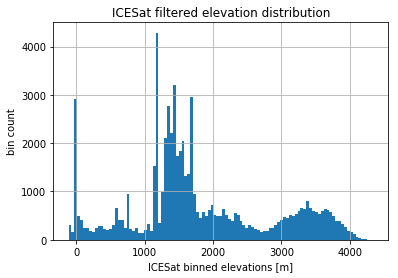

In [20]:
glas_df.hist(column="glas_z",bins=105)
plt.ylabel('bin count')
plt.xlabel('ICESat binned elevations [m]')
plt.title('ICESat filtered elevation distribution')

### The distribution appears to be tri-modal. You have a significant amount of land that is near zero elevation, a peak that is between 3000-4000 m, and a peak of values between 1000-2000m. There is a potentially-erroneous peak at ~1200m that didn't really separate when experimenting with bin-size. This could be indicative of a systematic error (like instrumentation problems) or perhaps low-level clouds that were within the filter range and unable to be filtered successfully.

### There are also a number of values below zero. This could be due to instrumentation error or attenuation due to water.

## Wait a minute...negative elevations!?  Who calibrated this thing? C'mon NASA.
* How many shots have a negative glas_z value?
* Create a scatterplot to see their spatial distribution
* Adjust the color ramp bounds to bring out more detail (hint: see vmin and vmax arguments for plot())
* Plot the 'dem_z' values extracted from the SRTM dataset - how do these compare?
* What do you think might be going on here?

3100


Text(0.5, 1.0, 'SRTM surface elevation')

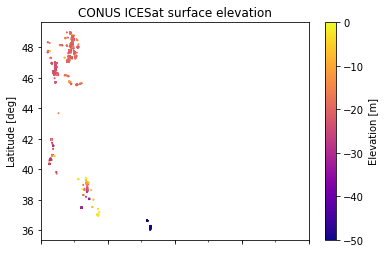

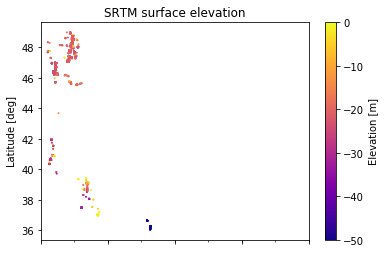

In [21]:
# number of negative points
negVal = glas_df.loc[glas_df["glas_z"] < 0]
print(len(negVal))

#spatial distribution
negVal.plot.scatter(x='lon',y='lat',s=1,c='glas_z',cmap=plt.get_cmap('plasma'),\
                    vmin=-50,vmax = 0)
plt.ylabel('Latitude [deg]')
plt.xlabel('Longitude [deg]')
plt.gcf().get_axes()[1].set_ylabel('Elevation [m]')
plt.xticks(ticks=range(-125,-100,5))
plt.title('CONUS ICESat surface elevation')

# SRTM spatial distribution
negVal.plot.scatter(x='lon',y='lat',s=1,c='dem_z',cmap=plt.get_cmap('plasma'),\
                    vmin=-50,vmax = 0)
plt.ylabel('Latitude [deg]')
plt.xlabel('Longitude [deg]')
plt.gcf().get_axes()[1].set_ylabel('Elevation [m]')
plt.xticks(ticks=range(-125,-100,5))
plt.title('SRTM surface elevation')

### A majority of the negative points were located in areas where the beam likely encountered water. A good indication of this is the clear outline of the Olympic Peninsula in the Northwest. You can also see a clear outline of the Columbia river (that's pretty cool).

### Alternatively, many of these points could also be in areas (like death valley and the central valley) that are very low in elevation and potentially below zero with respect to the coordinate's datum. For example, Wilcox hall has a negative elevation in many datums.

## Compute the difference between ICESat glas_z and SRTM dem_z values
* Store as a new column in the DataFrame
* Remember the order of this calculation (if output difference values are negative, which dataset is higher?)

In [22]:
glas_df['diff'] = glas_df['glas_z'] - glas_df['dem_z']
glas_df.describe()

,decyear,ordinal,lat,lon,glas_z,dem_z,dem_z_std,lulc,diff
count,65236.000000,65236.000000,65236.000000,65236.000000,65236.000000,65236.000000,65236.000000,65236.000000,65236.000000
mean,2005.945322,732291.890372,40.946798,-115.040612,1791.494167,1792.260964,5.504748,30.339444,-0.766797
std,1.729573,631.766682,3.590476,5.465065,1037.183482,1037.925371,7.518558,3.480576,12.363342
min,2003.139571,731266.943345,34.999455,-124.482406,-115.550000,-114.570000,0.000000,12.000000,-196.330000
25%,2004.444817,731743.803182,38.101451,-119.257599,1166.970000,1168.240000,0.070000,31.000000,-2.490000
50%,2005.846896,732256.116938,39.884541,-115.686241,1555.730000,1556.380000,1.350000,31.000000,-0.800000
75%,2007.223249,732758.486046,43.453565,-109.816475,2399.355000,2400.072500,9.530000,31.000000,0.790000
max,2009.775995,733691.238341,48.999727,-104.052336,4340.310000,4252.940000,49.900000,31.000000,199.910000


## Create a scatterplot of the differences
* Use the `cmap='RdBu'` for the color ramp
* Adjust the min and max of your color ramp to be symmetrical about 0 with appropriate range to bring out detail in spatial distribution

Text(0.5, 1.0, 'ICESat-SRTM')

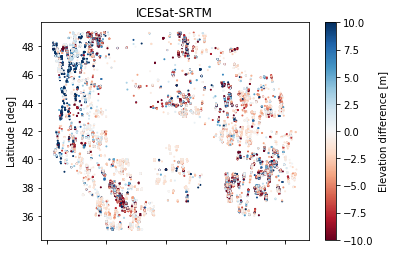

In [23]:
glas_df.plot.scatter(x="lon",y="lat",s=1,c="diff",cmap=plt.get_cmap('RdBu'),\
                     vmin=-10,vmax = 10)
plt.ylabel('Latitude [deg]')
plt.xlabel('Longitude [deg]')

plt.gcf().get_axes()[1].set_ylabel('Elevation difference [m]')
plt.xticks(ticks=range(-125,-100,5))
plt.title('ICESat-SRTM')

## Create a histogram of the difference values
* Limit the range to something reasonable (probably also want to increase number of bins)

Text(0.5, 1.0, 'ICESat-SRTM')

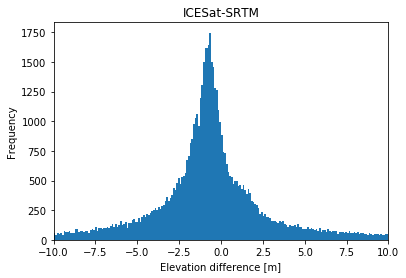

In [24]:
plt.figure()
glas_df["diff"].plot.hist(bins=4000)
plt.xlim([-10,10])
plt.xlabel('Elevation difference [m]')
plt.title('ICESat-SRTM')

## Compute the mean, median and standard deviatoin of the differences

In [25]:
print(glas_df["diff"].mean())
print(glas_df["diff"].median())
# This is surprisingly high given the observed distribution...
print(glas_df["diff"].std())

-0.7667968606291169
-0.7999999999999545
12.36334152209583


## Apply a simple absolute difference filter to remove gross outliers with differences greater than 30 m
* Store the result in a new Dataframe
* How many shots survived (passed)?

In [26]:
filtGross = glas_df.loc[glas_df["diff"].abs() < 30]
# check
print(filtGross["diff"].max())

29.990000000000236


## Recompute mean, median and standard deviation
* Note how your values changed

In [27]:
print(filtGross["diff"].mean())
print(filtGross["diff"].median())
# Much better. I guess this was due to the large values and kurtosis
print(filtGross["diff"].std())

-0.9203643768921219
-0.790000000000191
5.971052895146815


## Active remote sensing sanity check
* Do you see a systematic difference between the glas_z and dem_z values?
* Any clues from the scatterplot? (e.g., do some tracks (north-south lines of points) display systematic bias?)
* Brainstorm some ideas about what might be going on here.  Think about the nature of each sensor:
    * ICESat was a green laser (532 nm wavelength) with a big spot (~70 m in diameter)
    * SRTM was a C-band radar (5.3 GHz, 5.6 cm wavelength) with approximately 30 m ground sample distance (pixel size)
    * Consider different surfaces and how the laser/radar footprint might be affected:
        * Flat bedrock surface?
        * Dry sand dunes?
        * Steep montain topography like the Front Range in Colorado?  
        * Dense vegetation of the Hoh Rainforest in Olympic National Park?
* There are no "right" answers, and you don't need to write a long response (unless you want to) - I just wanted you to start thinking about the physical measurements

### Even though the standard deviation is high, the mean and median of the whole dataset are ~3cm from eachother suggesting that the data isn't really skewed. In other words, extreme negative differences are typically happening as frequently as the extreme positive differences with similar magnitudes. When filtering to points that we may be able to trust (< 30m absolute difference between SRTM and ICESat), this disparity between the mean and median grows to ~13cm. This suggests that the two platforms may have systematic differences in performance depending on the location.

### Flat, static surfaces are likely being captured by both platforms well. Unfortunately, we are only observing areas within ~100 km of glaciers so there is a lot of steep topography being observed. However, when we look at areas that we would expect to be more flat (western slopes of Colorado/Utah and southern California) differences look small. Due to the smaller footprint, we would also expect SRTM to better represent topography in steep terrain. However, you must also consider the observation angle and the path of movement with respect to the orientation of the topography. Radar with longer wavelengths also does a better job at penetrating the canopy. Therefore, we would expect differences in highly-vegetated areas where the canopy would be severly obstruct ground observations from the green lidar. Positive differences (ICESat elevation > SRTM elevation) therefore are prominent for the Hoh Rainforest. Due to the wavelength, ICESat has the potential to penetrate bodies of water to a small degree and visualize bathymetry while this is not a possibility with radar. This is particularly interesting when considering snowpacks at different temperatures and therefore different amounts of liquid water composition.

### Finally, given concurrent observations and no surface water, we would expect observations of surfaces like sand dunes and glaciers to be similar. However, elevation differences can arise when observing at two different times since melt, redistribution, and creep consistently alter the surface elevation.

## Let's check to see if differences are due to our land-use/land-cover classes
* Find unique values in the 'lulc' column (hint: see the value_counts() method for a Pandas DataSeries)
* Remember that I initially preserved only two classes (12 - snow/ice, 31 - barren land), so this isn't going to help us over forests
    * https://www.mrlc.gov/data/legends/national-land-cover-database-2011-nlcd2011-legend

In [28]:
# Two ways of doing things here! Also didn't use count() method.

#barren = glas_df.loc[glas_df["lulc"] == 31]
#snow = glas_df.loc[glas_df["lulc"] == 12]
group = filtGross.groupby("lulc")

## Use Pandas groupby to compute stats for the LULC classes
* This is one of the most powerful features in Pandas, efficient grouping and analysis based on some values
* Compute mean, median and std of the difference values (glas_z - dem_z) for each LULC class
* Do you see a difference between values over glaciers vs bare rock?

In [29]:
# grouping from step above
print(group["diff"].mean())
print(group["diff"].median())
print(group["diff"].std())

lulc
12   -1.424663
31   -0.902613
Name: diff, dtype: float64
lulc
12   -0.73
31   -0.80
Name: diff, dtype: float64
lulc
12    8.479115
31    5.862561
Name: diff, dtype: float64


### differences in elevtions over ice/snow have larger means and standard deviations. However, it should be considered that these points were collected at least three years from eachother and the snow/ice characteristics will change substantially over that time. Additionall, from the plot below, we can see that there are relatively few points with respect to the barren land collections.

## Create a scatterplot of difference values for points in the snow/ice class (12)

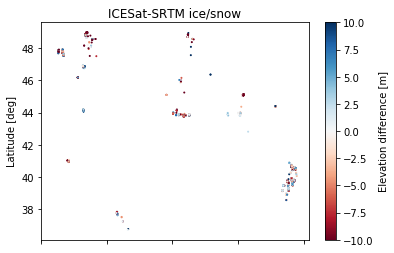

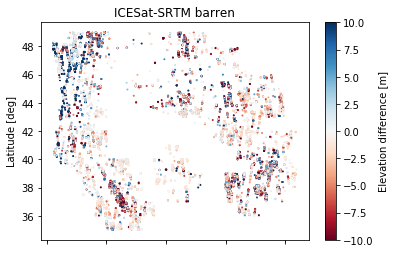

In [30]:
# Not so efficient. I think I am missing some of the groupby functionality

for i, item in group:
    group.get_group(i).plot.scatter(x="lon",y="lat",s=1,c="diff",\
                                   cmap=plt.get_cmap('RdBu'),vmin=-10,vmax=10)   
    plt.ylabel('Latitude [deg]')
    plt.xlabel('Longitude [deg]')
    plt.gcf().get_axes()[1].set_ylabel('Elevation difference [m]')
    plt.xticks(ticks=range(-125,-100,5))
    if i == 12:
        plt.title('ICESat-SRTM ice/snow')
    else:
        plt.title('ICESat-SRTM barren')

# Create a histogram that shows the number of points over time (decyear)
* How many distinct campaigns were there during the mission? Note: you will need smaller bins to properly resolve

Text(0, 0.5, 'Number of filtered ICESat CONUS collections')

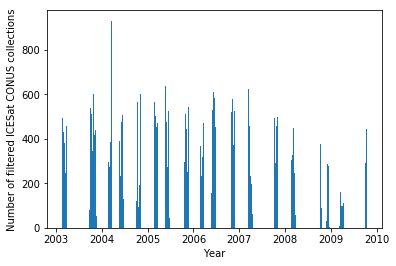

In [31]:
plt.figure()
#shows campaigns very well
glas_df["decyear"].plot.hist(bins=700)
plt.xlabel('Year')
plt.ylabel('Number of filtered ICESat CONUS collections')
# I counted 18 CONUS campaigns over the ~7-year period

# Extra credit

1. Groupby year  
    * See if you can use Pandas groupby to reproduce your NumPy histogram showing number of shots for each year
    * Will likely need to modify the decyear values (see int(floor())), or parse the Python time ordinals
        * Can create a new column with integer year, then groupby that column
        * Or, use lambda function  


2. Cluster by campaign
    * See if you can create an algorithm to cluster the points by campaign
    * Compute the number of days and number of shots for each campaign
    * Compare your answer with metadata here: https://nsidc.org/data/icesat/laser_op_periods.html (remember that this is a subset of points over CONUS, so your numbers might not match perfectly)

# Project update

* Prepare a short paragraph or brief, high-level outline of your project idea(s), and mention any packages and/or datasets that look promising.  It's OK if you're still fuzzy on details, just give me a general sense of what you're thinking.  
* Add as a new markdown file to your Week03 github repo

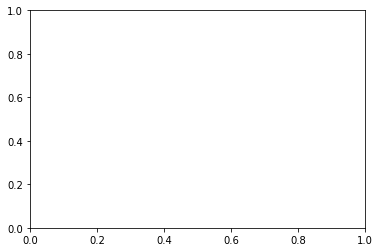

In [34]:
f,ax = plt.subplots()

In [35]:
f.aname

'Artist'